# FIT5145 ASSIGNMENT 1

#### Student ID : 30281229

#### Name       : Deepali Vinay

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from functools import reduce
%matplotlib inline

## Task A: Investigating Natural Increase in Australia's population

## A1. Investigating the Births, Deaths and TFR Data

### 1. Using Python, plot the number of births recorded in each state/territory for different Australian states over different years.

The below code plots a line graph for number of births v/s year for all the eight states.

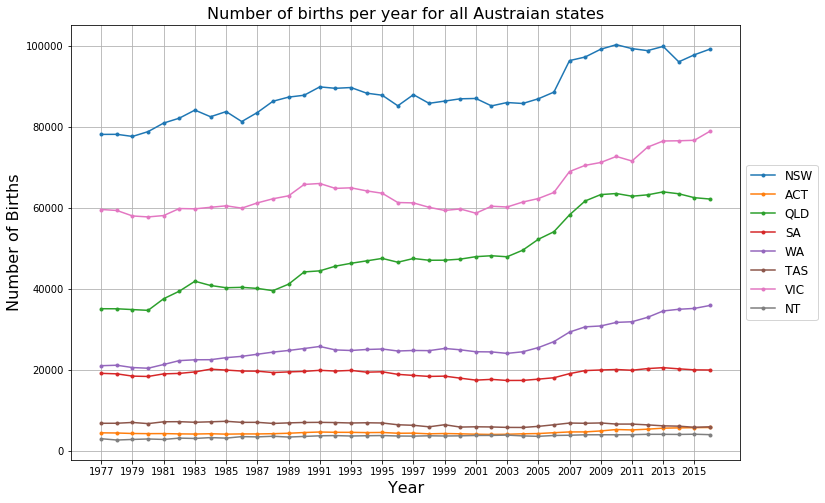

In [2]:
births_df=pd.read_csv('Births.csv', index_col='Year')  # Read csv file and store as dataframe with index 'Year'
plt.figure(figsize=(12,8))                             # Initialise figure with specific dimensions
plt.plot(births_df, marker='.')                        # Plot the dataframe
plt.legend(births_df, loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12) # Add legend to plot with specified position and fontsize
plt.xticks(np.arange(1977, 2016, 2))                   # Set x-axis scale
plt.xlabel('Year', fontsize=16)                        # Set x- axis label with font size
plt.ylabel('Number of Births', fontsize=16)            # Set y- axis label with font size
plt.title('Number of births per year for all Austraian states', fontsize=16) # Set plot title with font size
plt.grid()                                             # Show grid
plt.show()                                             # Show plot

In [3]:
births_df.head()    # Showing first 5 rows of the dataframe

,NSW,ACT,QLD,SA,WA,TAS,VIC,NT
Year,,,,,,,,
1977,78173,4381,35069,19086,20981,6739,59602,2923
1978,78190,4342,35054,18964,21094,6751,59364,2600
1979,77669,4217,34858,18403,20523,6947,58006,2747
1980,78859,4181,34666,18317,20354,6660,57768,2859
1981,80980,4193,37545,18960,21277,7112,58104,2749


### a. Describe the trend in number of births for Queensland and Tasmania for the period 1977 to 2016?

Below code creates a figure which contains 2 subplots to show trend in number of births for Queensland and Tasmania separately.

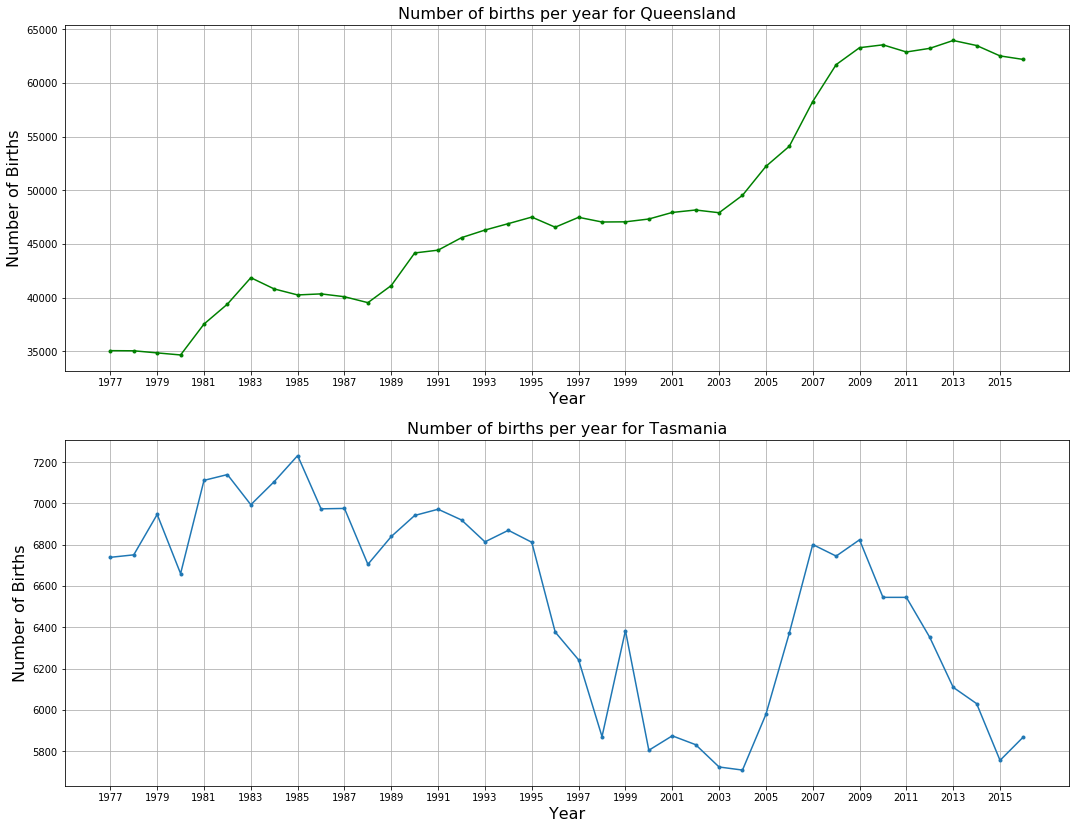

In [4]:
plt.figure(figsize=(18,14))      # Initialise figure with specific dimensions

plt.subplot(2,1,1)               # Select plot 1                     
plt.plot(births_df['QLD'], marker='.', color='g') # Plot 'QLD' column of dataframe

plt.xticks(np.arange(1977, 2016, 2))        # Set x-axis scale 
plt.xlabel('Year', fontsize=16 )            # Set x- axis label with font size
plt.ylabel('Number of Births', fontsize=16) # Set y- axis label with font size
plt.title('Number of births per year for Queensland', fontsize=16) # Set plot title with font size
plt.grid()     # Show grid


plt.subplot(2,1,2)               # Select plot 1 
plt.plot(births_df['TAS'], marker='.') # Plot 'TAS' column of dataframe

plt.xticks(np.arange(1977, 2016, 2))        # Set x-axis scale 
plt.xlabel('Year', fontsize=16 )            # Set x- axis label with font size
plt.ylabel('Number of Births', fontsize=16) # Set y- axis label with font size
plt.title('Number of births per year for Tasmania', fontsize=16) # Set plot title with font size
plt.grid()     # Show grid

plt.show()

* The 1st subplot shows an increasing trend in number of births per year for Queensland. Since 1977 Queensland has seen an increase in number of births from 35000 to approximately 63000 by the year 2016.

* The 2nd subplot shows a fluctuating trend in number of births each year for Tasmania which reached maximum in 1985 and an all time low in 2004. But overall the trend has been constant in the range 5700 to 7200.

### b. Draw a bar chart to show the number of births in each Australian state in 2016.

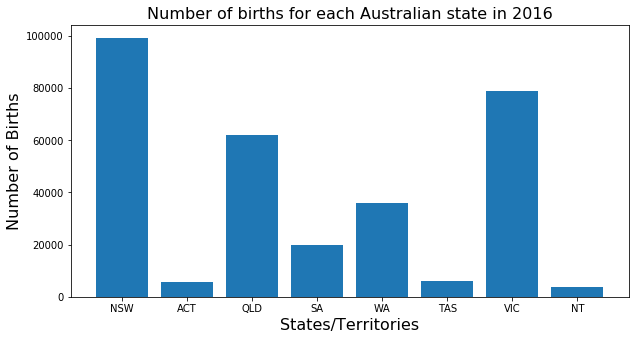

In [5]:
plt.figure(figsize=(10,5))     # Initialise figure with specific dimensions
plt.bar(births_df.loc[2016].index, births_df.loc[2016].values) # Plot bar chart for dataframe index='2016'
plt.xlabel('States/Territories', fontsize=16 ) # Set x- axis label with font size
plt.ylabel('Number of Births', fontsize=16)    # Set y- axis label with font size
plt.title('Number of births for each Australian state in 2016', fontsize=16) # Set plot title with font size
plt.show()

The above bar chart shows the number of births in each Australian state in 2016.

### 2. We will now investigate the trend in the total number of births over different years. For this, you will need to aggregate the total number of births registered in Australia by year.

The below cell is adding number of births of all the states per year and creating a scatter plot to show the trend in the total number of births over different years.

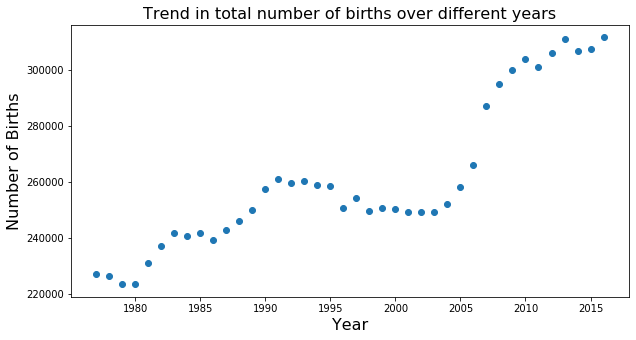

,Total Births
Year,
1977,226954
1978,226359
1979,223370
1980,223664
1981,230920


In [6]:
plt.figure(figsize=(10,5))  # Initialise figure with specific dimensions

total_births = pd.DataFrame(births_df.sum(axis=1), columns=['Total Births']) # Aggregate by year total number of births

# Create scatter plot
plt.scatter(total_births.index, total_births.values)
plt.xlabel('Year', fontsize=16 )
plt.ylabel('Number of Births', fontsize=16)
plt.title('Trend in total number of births over different years', fontsize=16)
plt.show()

total_births.head()        # Show first 5 rows of the dataframe

### a. Fit a linear regression using Python to the above aggregated data (i.e., total number of births registered in Australia over time) and plot the linear fit.

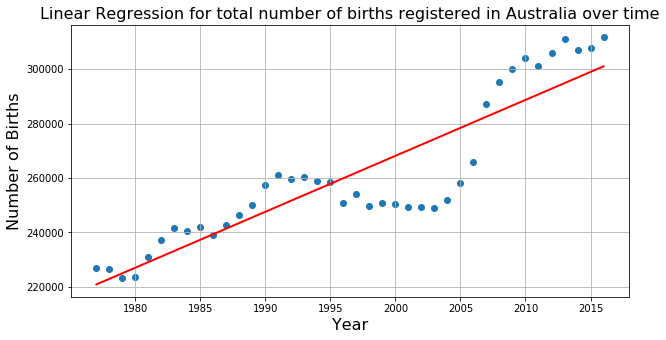

In [7]:
# !pip install scikit-learn

x,y = np.array(total_births.index), np.array(total_births.values) # Create array of year and total births
x=x.reshape(len(x),1)  # Reshape array to 2D 
y=y.reshape(len(y),1)  # Reshape array to 2D 
linear_regressor = LinearRegression() # Initialise object for linear regression
linear_regressor.fit(x,y)             # Fitting data into linear model
new_y=linear_regressor.predict(x)     # Predict number of births using model created

plt.figure(figsize=(10,5))            # Initialise figure with specific dimensions
plt.scatter(total_births.index, total_births.values) # Create scatter plot for total number of births over different years
plt.plot(x,new_y, color='red', linewidth=2)          # Plot linear fit
plt.xlabel('Year', fontsize=16 )                     # Set x- axis label with font size
plt.ylabel('Number of Births', fontsize=16)          # Set y- axis label with font size
plt.title('Linear Regression for total number of births registered in Australia over time', fontsize=16) # Set plot title with font size
plt.grid()       # Show grid
plt.show()       # Show plot

### b. Does it look like a good fit to you? Identify the period time having any unusual trend(s) in your plot.

Yes, the linear fit looks like a good fit but only till 1995. The year 1995 onwards, the trend is not consistent with the linear model and shows significant deviation.

### c. Use the linear fit to predict the total births in Australia for the years 2050 and 2100.

Below code is plotting the linear model for the total number of births from 1977 to 2016, predicting total births for the years 2050 and 2100 and also plotting the bridging years from 2016 to 2050.

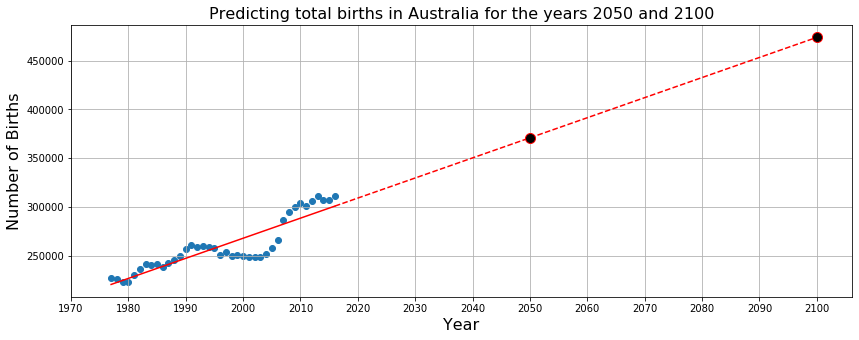

In [8]:
year=np.array([2050,2100]).reshape(2,1)  # Create 2D array of 2 specifed years for prediction

predict_birth=linear_regressor.predict(year) # Predict number of births for the 2 years using linear regression model

# Prediction for the years 2016 and 2050 to get continuous linear plot  
bridge_year=np.array([2016,2050]).reshape(2,1) 
predict_bridge=linear_regressor.predict(bridge_year)

# Plot linear predicted line with scatter plot to compare the prediction with actual data
plt.figure(figsize=(14,5))  
plt.scatter(total_births.index, total_births.values)  
plt.plot(x,new_y, color='red')                            # Plot linear regression from 1977 to 2016 
plt.plot(bridge_year, predict_bridge, '--', color='red')  # Linear plot to bridge gap between 2016 and 2050
plt.plot(year, predict_birth, '--', color='red', marker='o', markerfacecolor='black', markersize=10) # Plot predicted number of births for 2050 and 2100
plt.xlabel('Year', fontsize=16 )
plt.ylabel('Number of Births', fontsize=16)
plt.title('Predicting total births in Australia for the years 2050 and 2100', fontsize=16)
plt.xticks(np.arange(1970, 2110, 10))
plt.grid()
plt.show()


In [9]:
print('The predicted total births in Australia for the year 2050 is:', int(predict_birth[0][0]))
print('The predicted total births in Australia for the year 2100 is:', int(predict_birth[1][0]))

The predicted total births in Australia for the year 2050 is: 370945
The predicted total births in Australia for the year 2100 is: 473754


### d. Instead of fitting the linear regression to all of the data, try fitting it to just the most recent data points (say from 2010 onwards). How is the fit? Which model would give better predictions of future population of Australia do you think and why?

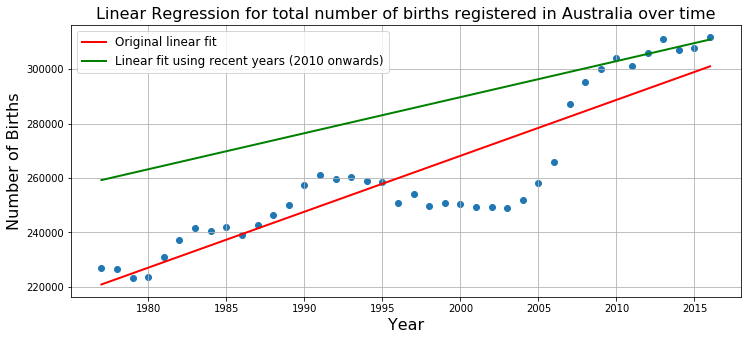

In [10]:
# Fitting recent data after year 2010 into linear regression model
births_recent=total_births[total_births.index>=2010] 
x_recent=np.array(births_recent.index).reshape(len(births_recent),1)
y_recent=np.array(births_recent.values).reshape(len(births_recent),1)
linear_regressor_recent = LinearRegression()
linear_regressor_recent.fit(x_recent,y_recent)

# Predict number of births using new linear regression model
predicted_recent_y=linear_regressor_recent.predict(x)

# Plot linear predicted line for recent data with scatter plot to compare the prediction with actual data
plt.figure(figsize=(12,5))
plt.scatter(total_births.index, total_births.values)
plt.plot(x,new_y, color='red', linewidth=2, label='Original linear fit')
plt.plot(x, predicted_recent_y, color='green', linewidth=2, label='Linear fit using recent years (2010 onwards)')
plt.xlabel('Year', fontsize=16 )
plt.ylabel('Number of Births', fontsize=16)
plt.title('Linear Regression for total number of births registered in Australia over time', fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()

* The model with green line (original linear fit) is a good fit when considering only the recent years (from 2010 to 2016). It fits more appropriately compared to the red line (linear fit using recent years). 

* The model with green line would give better predictions of future populations of Australia. Because of its appropriate fit for the recent years, green line is expected to predict better for the next coming years. 
* Also the green line was modelled using the data which seems to have minimum mean squared error with the fit. Whereas the model with red line is an underfit for the dataset which it was modelled against and has relatively large mean squared error.

### e. Challenge: Can you think of a better model than linear regression to fit to all of the data to capture the trend in the number of births.



`Polynomial regression` could be a better model than linear regression to fit the non-linear trend in the number of births. 

The below code is plotting the trend in the number of births along with a possible polynomial fit. 

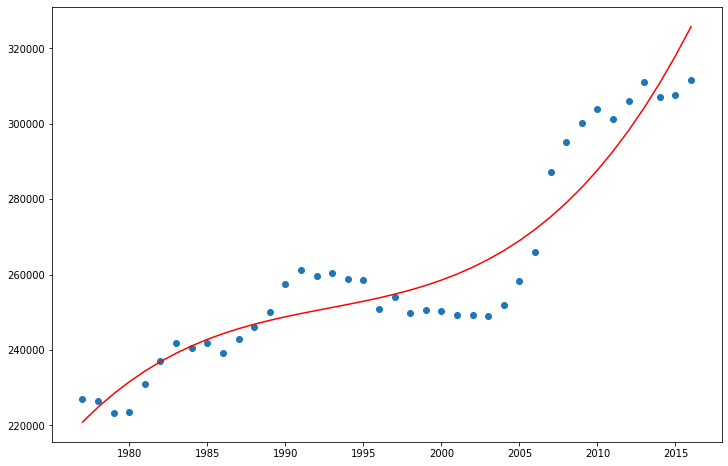

In [11]:
# Implementation of polynomial 
from sklearn.preprocessing import PolynomialFeatures


polynomial_features= PolynomialFeatures(degree=3)  # Initialise object for polynomial feature transformation   
x_poly = polynomial_features.fit_transform(x)      # Fit to data, then transform it

model = LinearRegression()                         # Initialise a regression model object
model.fit(x_poly, y)                               # Fit the model using actual data


y_poly_pred = model.predict(x_poly)                # Predict using polynomial model

# Create scatter plot and plot polynomial model
plt.figure(figsize=(12,8))
plt.scatter(x, y)
plt.plot(x, y_poly_pred, color='r')
plt.show()

#### i. Describe the model you suggested and explain why it is better suited for this task.

* As the above scatter plot depict, the data points are non-linear in nature therefore the model suggested here is of polynomial regression. 
* Polynomial regression model follows a polynomial expression of degree 'n' and tries to fit the non-linear trend of the given dataset.                                                         

* Since the data points do not follow linearity completely it increases the mean square error for the linear fit. Instead we can use a polynomial regression which will fit more data points and give a more accurate prediction for future because the mean square error will be comparatively lesser than linear regression. 

Below is a small code to calculate mean squared error for both linear regression model and polynomial regression model.

In [12]:
from sklearn.metrics import mean_squared_error

mse_poly=mean_squared_error(y, y_poly_pred)
mse_lin=mean_squared_error(y, new_y)

print('Mean squared error for linear regression :', mse_lin)
print('Mean squared error for polynomial regression :', mse_poly)
print('MSE(linear)-MSE(polynomial) =', mse_lin-mse_poly)

Mean squared error for linear regression : 142296938.527425
Mean squared error for polynomial regression : 77541973.27034679
MSE(linear)-MSE(polynomial) = 64754965.2570782


#### ii. Use your model to predict the total births for the years 2050 and 2100.

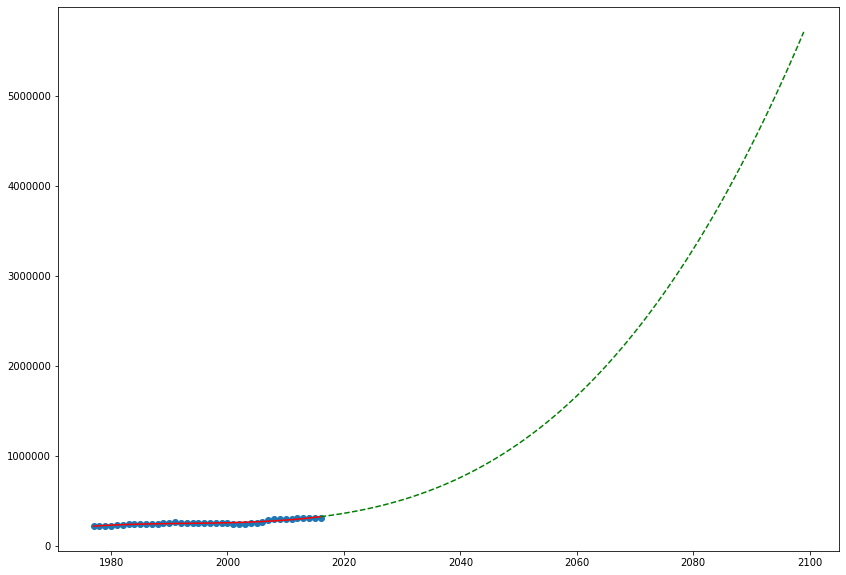

In [13]:
year1 = np.arange(2016,2100, 1)
year1 = year1.reshape(len(year1),1)
year1_trans = polynomial_features.fit_transform(year1) 

year_pred = np.array([2050,2100]).reshape(2,1)
year_pred_trans = polynomial_features.fit_transform(year_pred) 

y_poly_pred = model.predict(x_poly)
birth1 = model.predict(year1_trans)
birth_pred = model.predict(year_pred_trans)

plt.figure(figsize=(14,10))
plt.scatter(x, y)
plt.plot(x, y_poly_pred, color='r')
plt.plot(np.arange(2016,2100, 1), birth1, '--', color='g' )

plt.show()

In [14]:
print('The predicted total births in Australia for the year 2050 is:', int(birth_pred[0][0]))
print('The predicted total births in Australia for the year 2100 is:', int(birth_pred[1][0]))

The predicted total births in Australia for the year 2050 is: 1137783
The predicted total births in Australia for the year 2100 is: 5872238


### 3. Inspect the data on Total Fertility Rate (TFR.csv) for Queensland and Northern Territory.
### a. What was the minimum value for TFR recorded in the dataset for Queensland and when did that occur? What was the corresponding TFR value for Northern Territory in the same year?

In [15]:
tfr_df = pd.read_csv('TFR.csv', index_col='Year')  # Read csv file and store as dataframe with index 'Year'

In [16]:
tfr = tfr_df.reset_index()  # Reset index of dataframe to default values
qld_min = tfr['QLD'].min()  # Finding minimum value of TFR from 'QLD' column of the dataframe
qld_min_yr = tfr[tfr['QLD']==qld_min]['Year'].values  # For QLD, finding corressponding year for the minimum value of TFR 
tfr_nt=tfr[tfr['Year']==qld_min_yr[0]]['NT'].values  # For NT, finding TFR corresponding to the year of minimum value of TFR for QLD 

print('The minimum value for TFR recorded in the dataset for Queensland is', qld_min, 'for the year', qld_min_yr[0])
print('The corresponding TFR value for Northern Territory in the same year is', tfr_nt[0])

The minimum value for TFR recorded in the dataset for Queensland is 1.8 for the year 1999
The corresponding TFR value for Northern Territory in the same year is 2.123


### 4. Next, plot the natural growth in Australia's population over different years. For this, you will need to aggregate the total births and deaths by year. (HINT: Natural growth in a population is the difference between the total numbers of births and deaths in a population, for instance, Natural Growth of Australia’s Population = Total Births in Australia - Total Deaths in Australia)


Below code is plotting the natural growth in Australia's population over different years.

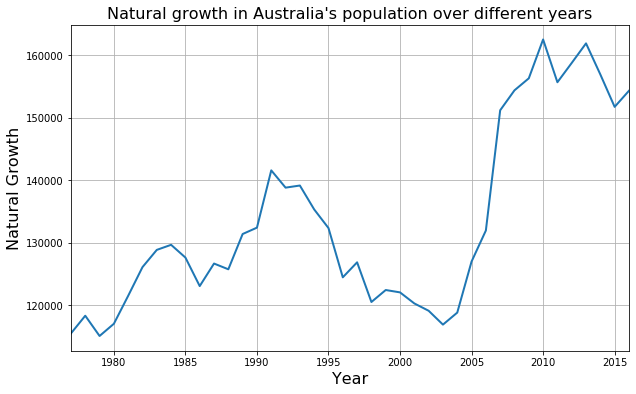

In [17]:
deaths_df=pd.read_csv('Deaths.csv', index_col='Year')   # Read csv file and store as dataframe with index 'Year'

# Calculate natural growth for each year by subtracting number of deaths from number of births per year
natural_growth=births_df.sum(axis=1)-deaths_df.sum(axis=1) 

# Ploting trend in natural growth from 1977 to 2016
plt.figure(figsize=(10,6))
plt.plot(natural_growth, linewidth=2)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Natural Growth', fontsize=16)
plt.title("Natural growth in Australia's population over different years", fontsize=16)
plt.xlim(1977, 2016)
plt.grid()
plt.show()


### a. Describe the trend in natural growth in Australian population over time using linear regression?

Below code is plotting linear regression for the natural growth trend in Australia.

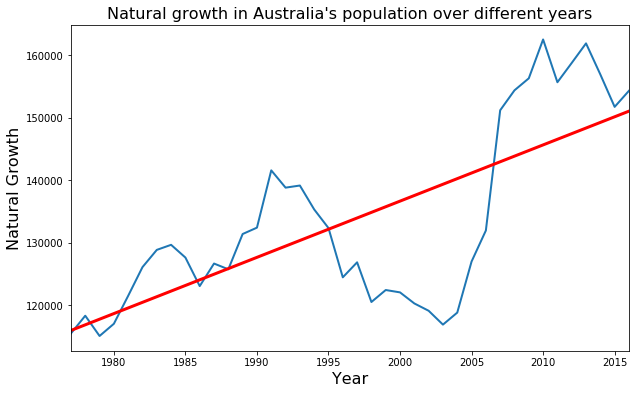

In [18]:
natural_growth_df=natural_growth.to_frame().reset_index().rename({0:'Natural growth'}, axis=1)  # Convert series to dataframe and rename column

# Finding parameters for linear regression
slope, intercept, r_value, p_value, std_err = linregress(natural_growth_df['Year'],natural_growth_df['Natural growth'])

# List comprehension to calculate natural growth for each year using linear regression parameters
line = [slope*each + intercept for each in natural_growth_df['Year']]

# Plot line graph trend along with linear regression model
plt.figure(figsize=(10,6))
plt.plot(natural_growth, linewidth=2)   # Plot natural growth series
plt.xlabel('Year', fontsize=16)
plt.ylabel('Natural Growth', fontsize=16)
plt.title("Natural growth in Australia's population over different years", fontsize=16)
plt.xlim(1977, 2016)

plt.plot(natural_growth_df['Year'], line, 'r', linewidth=3)  # Plot the linear model

plt.show()

The above line graph shows that the trend in natural growth in Australia over time has been inconsistent and fluctuating however the linear regression suggests an overall upward trend.

## A2. Investigating the Migration Data (NOM and NIM)

### 1. Let’s look at the Net Overseas Migration (NOM) data in different states over time.

The below code is plotting NOM data in different states over time.

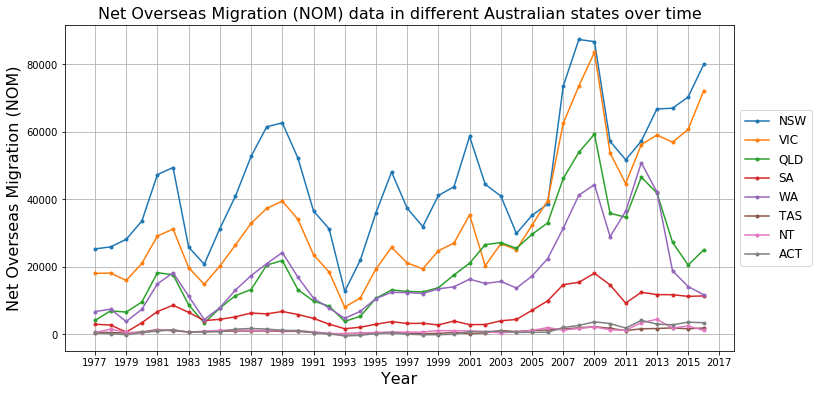

In [19]:
nom_df = pd.read_csv('NOM.csv', index_col='Year')  # Read csv file and store as dataframe with index 'Year'
 
# Plot graph of NOM for different states of Australia
plt.figure(figsize=(12,6))
plt.plot(nom_df, marker='.')
plt.legend(nom_df, loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12) # Add legend to plot with specified position and fontsize
plt.xticks(np.arange(1977, 2018, 2))
plt.xlabel('Year', fontsize=16 )
plt.ylabel('Net Overseas Migration (NOM)', fontsize=16)
plt.title('Net Overseas Migration (NOM) data in different Australian states over time', fontsize=16)
plt.grid()
plt.show()


### a. Use Python to plot the NOM to Victoria, Tasmania and Western Australia over time. Explain and compare the trend in all three states (VIC, TAS and WA).

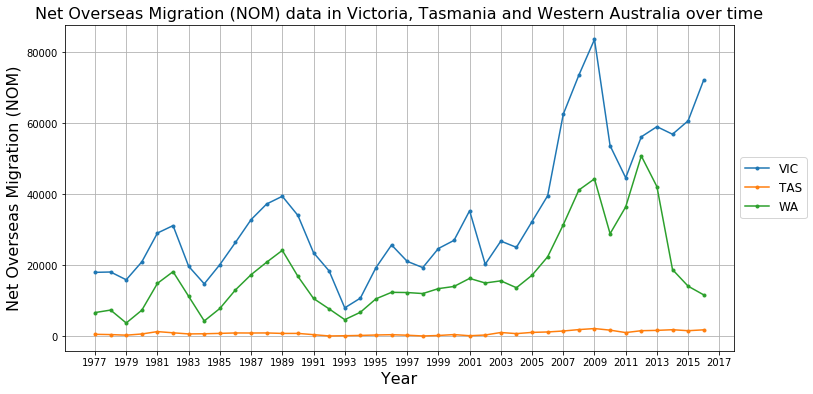

In [20]:
# Plot trends of NOM for VIC, TAS and WA columns of nom_df dataframe
plt.figure(figsize=(12,6))
plt.plot(nom_df[['VIC','TAS','WA']], marker='.')
plt.legend(nom_df[['VIC','TAS','WA']], loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12) # Add legend to plot with specified position and fontsize
plt.xticks(np.arange(1977, 2018, 2))
plt.xlabel('Year', fontsize=16 )
plt.ylabel('Net Overseas Migration (NOM)', fontsize=16)
plt.title('Net Overseas Migration (NOM) data in Victoria, Tasmania and Western Australia over time', fontsize=16)
plt.grid()
plt.show()

* From the above plot we can conclude that net overseas migration (NOM) to Tasmania was almost consistent over the years from 1977 to 2016. Whereas Victoria and Western Australia saw fluctuations untill 2004 after which there was a boom and, Victoria and Western Australia reached their maximum NOM in the year 2009 and 2012 respectively.
* Since 2012 WA has shown steep downfall whereas VIC is seen to have gradual increase.

### b.Plot the Net Overseas Migration (NOM) to Australia over time. Do you find the trend strange? Explain the reason to your answer (Hint: You might go online to find contributing factors to this trend).

Below is the code to plot NOM to Australia over time.

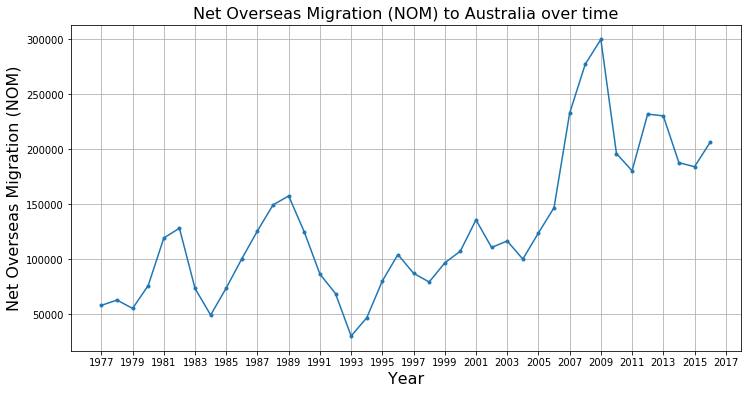

In [21]:
plt.figure(figsize=(12,6))               # Initialise figure with specific dimensions

plt.plot(nom_df.sum(axis=1), marker='.') # Plot NOM of Australia by adding NOM of individual states in each year 

plt.xticks(np.arange(1977, 2018, 2))
plt.xlabel('Year', fontsize=16 )
plt.ylabel('Net Overseas Migration (NOM)', fontsize=16)
plt.title('Net Overseas Migration (NOM) to Australia over time', fontsize=16)
plt.grid()
plt.show()

1. * Yes, the trend is strange. From year 2009 to 2010 we see a decrease in net overseas migration (NOM) to Australia by approximately 35%. This percentage change (decrease) has been observed the maximum from the year 1977 to 2016 for any two consecutive years.

   * The major contributing factor for this drastic change has been the global financial crisis, due to which in 2008-09, the Australian government conducted a review of permanent skilled migration. The review identified “the need for a shift in focus away from ‘supply driven’ independent skilled migration towards ‘demand-driven’ outcomes, in the form of employer and government-sponsored skilled migration.” As a result, changes were made to the system to apply priority processing arrangements for sponsored migrants rather than those opting for independent points-based skilled migration. 

     [1] <cite data-cite="https://www.loc.gov/law/help/points-based-immigration/australia.php">(Points-Based Immigration Systems: Australia)</cite>


2. * The growth in the Australian population comprises two components:
     * Natural growth
     * Net Overseas Migration (NOM) 
 
     i).  NOM includes both permanent and long-term (greater than 12 months) arrivals and departures.
    
     ii). The relative contribution these two components make has changed. For example, in 1985 the natural increase represented 58.5% of Australia’s population growth and NOM 41.5%. By 2015, natural increase represented only 45.7% of Australia’s population growth, with NOM at 54.3%. Interestingly, the NOM increase in recent years has been driven by people staying in Australia on long-term temporary visas, such as overseas students and temporary skills migrants.
    
     [2]<cite> Source: https://www.aph.gov.au/About_Parliament/Parliamentary_Departments/Parliamentary_Library/pubs/BriefingBook45p/MigrationFlows </cite> 

### 2. Now let's look at the relationship between Net Overseas Migration (NOM) and Net Interstate Migration (NIM)

In [22]:
nim_df = pd.read_csv('NIM.csv', index_col='Year') # Read csv file and store as dataframe with index 'Year'

### a. Use Python to combine the data from the different files into a single table. The resulting table should contain the NOM and NIM values for each of the states for a given year. What are the first year and last year for the combined data?

In [23]:
combined = pd.concat({'NIM':nim_df,'NOM':nom_df},axis=1) # Concatenate 2 dataframes along axis=1
combined.head()     # Show first 5 rows of the dataframe

NIM                                                NOM                \
        NSW    VIC    QLD    SA    WA   TAS    NT   ACT    NSW    VIC    QLD   
Year                                                                           
1977  -9000 -10000  11000     0  5000 -1000  2000  2000  25236  17969   4012   
1978  -2000 -11000  12000 -1500  1500 -1000  1500   500  25825  18068   6857   
1979   1500 -11000  13000 -4000  1000  -500   500  -500  28086  15874   6489   
1980  -2000 -11000  17000 -4500  1500 -1000   500  -500  33499  20932   9480   
1981 -14963 -15398  35054 -5109  2134 -1014   335 -1039  47291  29052  18168   

                                    
        SA     WA   TAS    NT  ACT  
Year                                
1977  2874   6631   506   408  261  
1978  2638   7340   428  1428  131  
1979   541   3698   263   442 -256  
1980  3325   7309   599   361  436  
1981  6655  14866  1268  1043  832

The above combined dataframe consists of multi-level columns, NIM and NOM, each with 8 sub columns representing data of different states of Australia.

In [24]:
first_year=combined.index.min()   # Fetch minimum value of the year from 'combined' dataframe
last_year=combined.index.max()    # Fetch maximum value of the year from 'combined' dataframe
print('The first year and last year for the combined data are', first_year, 'and', last_year, 'respectively.')

The first year and last year for the combined data are 1977 and 2016 respectively.


### b. Now that you have the data combined, we can see whether there is a relationship between NOM and NIM. Plot the values against each other using scatter plot. Can you see any relationship between NOM and NIM?

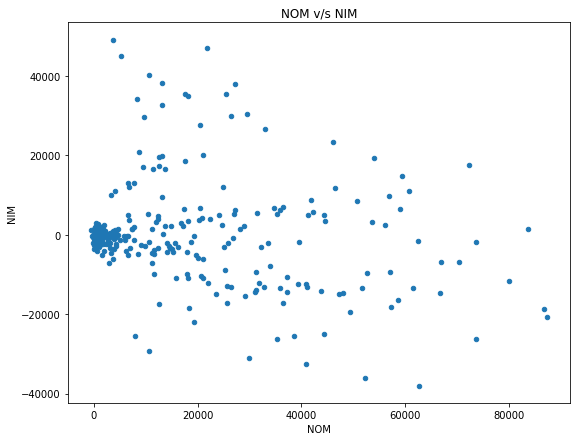

In [25]:
# Scater plot for NOM v/s NIM
combined.plot('NOM','NIM', kind='scatter', figsize=(9,7), title='NOM v/s NIM')
plt.show()

There seems to be no relationship or zero correlation between NOM and NIM, as the data points are scattered with no specific trend depicting increase or decrease.

### c. Try selecting and plotting the data for Victoria only using scatter plot. Can you see a relationship now? If so, explain the relationship.

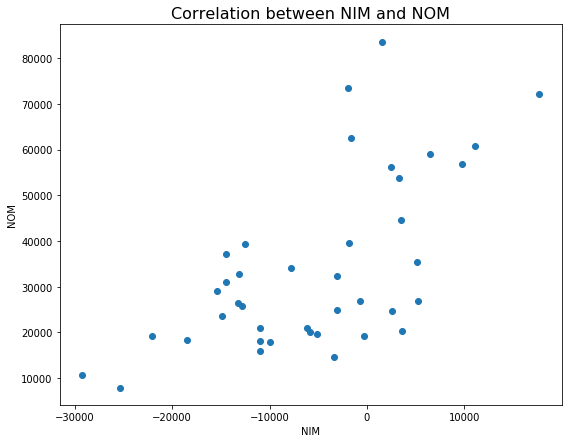

In [26]:
# Scatter plot of NOM v/s NIM for only Victoria
plt.figure(figsize=(9,7))
plt.scatter(combined['NIM']['VIC'], combined['NOM']['VIC'])
plt.xlabel('NIM')
plt.ylabel('NOM')
plt.title('Correlation between NIM and NOM', fontsize=16)
plt.show()

Yes, there seems to be a positive correlation between NOM and NIM of Victoria, i.e. with increase in NIM there was an increase in NOM.

### d. Finally, plot the Net Interstate Migration (NIM) for Queensland and New South Wales over different years. Note graphs for both QLD and NSW should be on the same plot. Compare the plots for these two states. What can you infer from the trend you see for these two states?

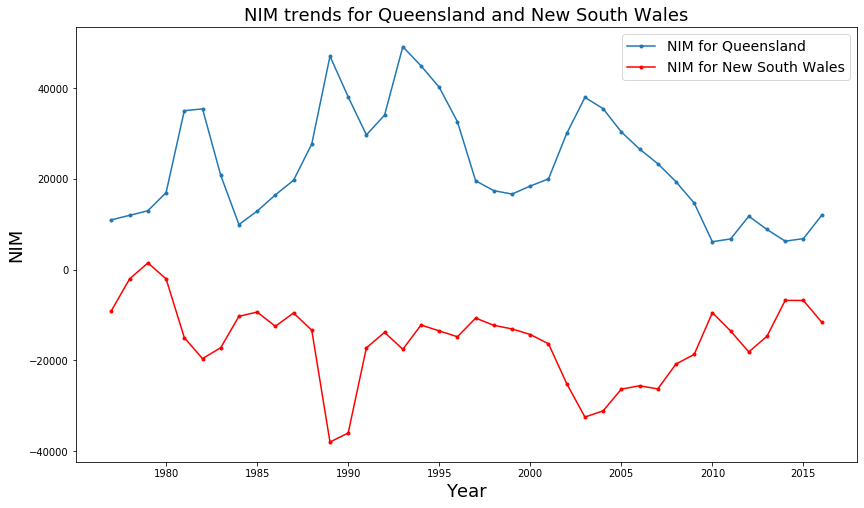

In [27]:
# From the combined table of NIM and NOM fetching only NIM data of Queensland and NSW and plotting with respect to the corressponding year
nim = combined['NIM']
fig = plt.figure(figsize=(14,8))
plt.plot(nim['QLD'].index,nim['QLD'].values, label = 'NIM for Queensland', marker = '.')
plt.plot(nim['NSW'].index,nim['NSW'].values, color='red', label = 'NIM for New South Wales',marker = '.')
plt.legend(fontsize=14)
plt.xlabel('Year', fontsize=18)
plt.ylabel('NIM', fontsize=18)
plt.title('NIM trends for Queensland and New South Wales', fontsize=18)
plt.show()

* The NIM trend for Queensland is almost an inverted reflection of the NIM trend for New South Wales. 
* This shows a negative correlation between the two, which means that increase in the NIM of QLD has direct relation with the migration of population from NSW and vice versa. 
* The migration from NSW was a key factor in the increase in NIM of Queensland, and that's clear from the graph above.

## A3. Visualising the Relationship over Time

### Now let's look at the relationship between other variables impacting the population size and growth of Australian states/territories over time. Ensure that you have combined all the data from the different files (Births.csv, Deaths.csv, TFR.csv, NOM.csv and NIM.csv) into a single table.

Below code is to combine the data of births, deaths, TFR, NIM and NOM into one table.

In [28]:
# Reset index of dataframe to make 'year' as a column
births_df.reset_index(inplace=True)
deaths_df.reset_index(inplace=True)
tfr_df.reset_index(inplace=True)
nom_df.reset_index(inplace=True)
nim_df.reset_index(inplace=True)

# Melt the dataframes by converting the column titles as a column value itself

births_melted_df = pd.melt(births_df, id_vars=["Year"], value_vars=["NSW","VIC","QLD","SA","WA","TAS", "NT","ACT"],
var_name = "State", value_name='Births')

deaths_melted_df = pd.melt(deaths_df, id_vars=["Year"], value_vars=["NSW","VIC","QLD","SA","WA","TAS", "NT","ACT"],
var_name = "State", value_name='Deaths')

tfr_melted_df = pd.melt(tfr_df, id_vars=["Year"], value_vars=["NSW","VIC","QLD","SA","WA","TAS", "NT","ACT"],
var_name = "State", value_name='TFR')

nom_melted_df = pd.melt(nom_df, id_vars=["Year"], value_vars=["NSW","VIC","QLD","SA","WA","TAS", "NT","ACT"],
var_name = "State", value_name='NOM')

nim_melted_df = pd.melt(nim_df, id_vars=["Year"], value_vars=["NSW","VIC","QLD","SA","WA","TAS", "NT","ACT"],
var_name = "State", value_name='NIM')

# Merge all the melted dataframes on the columns 'Year' and 'State' and reduce
dfs = [births_melted_df, deaths_melted_df, tfr_melted_df, nom_melted_df, nim_melted_df]
final_comb = reduce(lambda left,right: pd.merge(left,right,on=["Year", "State"]), dfs)
final_comb.head()   # Show first 5 rows of the dataframe

,Year,State,Births,Deaths,TFR,NOM,NIM
0,1977,NSW,78173,42075,1.995,25236,-9000
1,1978,NSW,78190,40121,1.953,25825,-2000
2,1979,NSW,77669,39975,1.902,28086,1500
3,1980,NSW,78859,39799,1.925,33499,-2000
4,1981,NSW,80980,39979,1.942,47291,-14963


### 1. Use Python to build a Motion Chart, that compares the role migration (overseas and interstate) plays towards population growth in each Australia state/territory over time. The motion chart should show the Net Overseas Migration (NOM) on the x-axis, the Net Interstate Migration (NIM) on the y-axis, and the bubble size should show the Total Population Growth.

In [29]:
#!pip install MotionChart
#!pip install pyperclip
from motionchart.motionchart import MotionChart  # Import MotionChart package

In [30]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [31]:
# Calculate Total Population Growth
final_comb['Total Population Growth']=final_comb['Births']-final_comb['Deaths']+final_comb['NOM']+final_comb['NIM']

In [32]:
# Generate motion chart using the 'final_comb' dataframe
mChart=MotionChart(df=final_comb, x='NOM', y='NIM', key='Year', color="State",\
                   category="State", title="Population Growth",size='Total Population Growth')
mChart.to_notebook()

### 2. Run the visualisation from start to end. (Hint: In Python, to speed up the animation, set timer bar next to the play/pause button to the minimum value.) And then answer the following questions:
### a. Comment generally on the trend you see in Net Overseas Migration (NOM) and Net Interstate Migration (NIM) overtime. Is there any relationship between the two variables?


From the above visualisation we donot see any relationship between the two variables. The trend keeps fluctuating with time, there is no specific trend in change of NIM v/s NOM.

### b.Select VIC and NSW for this question: In which year(s) does VIC have a higher Net Overseas Migration (NOM) than NSW. Please support your answer with a relevant python code and motion chart screenshot.


In [33]:
# Find year/years for which NOM of Victoria is more than NOM of NSW
yr=nom_df[nom_df['VIC']>nom_df['NSW']]['Year']
print('In', int(yr.values), 'VIC has higher Net Overseas Migration (NOM) than NSW.')

In 2006 VIC has higher Net Overseas Migration (NOM) than NSW.


The below image shows Motion chart for year v/s NOM and highlights VIC which shows that in 2006 NOM of VIC was more than NSW.

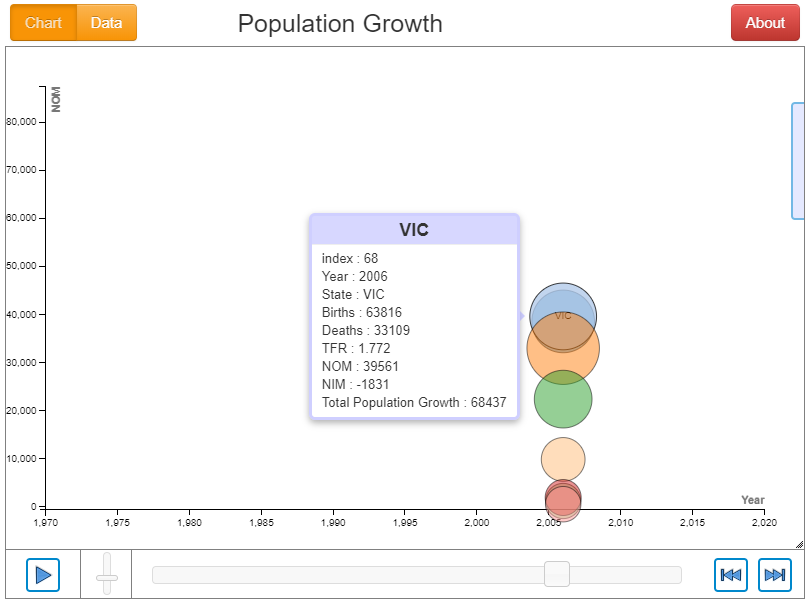

### c. Which state has the highest Net Interstate Migration most of the years (for the period 1977to 2016)?

By running the Motion Chart visualisation it is visible that `QLD (Queensland)` has the highest Net Interstate Migration (NIM) for most of the period from 1977 to 2016.

Below python code is finding the state which has the highest Net Interstate Migration most of the years (for the period 1977to 2016).

In [34]:
h_df=final_comb[['Year','NIM']]  # Isolate only Year and NIM column from final_comb to make new dataframe
high_count = final_comb[h_df['NIM'] == h_df.groupby('Year')['NIM'].transform('max')][['Year','State', 'NIM']] # Group by year and get the rows only where NIM is maximum for the year
high_count=high_count.groupby('State').count()[['Year']]   # Group by state and count the number of years with max NIM 
print(high_count,'\n')
print(high_count['Year'].idxmax(), 'state has the highest Net Interstate Migration most of the years (for the period 1977to 2016).')

       Year
State      
QLD      36
VIC       2
WA        1 

QLD state has the highest Net Interstate Migration most of the years (for the period 1977to 2016).


## Task B: Exploratory Analysis of Data

## B1. Daily number of crimes

In [35]:
df = pd.read_csv('Crime_Statistics_SA_2014_2019.csv') # Read csv file and store as dataframe 

### 1.For each suburb, calculate the number of days that at least 15 crimes have occurred per day.

In [36]:
new_df=df.groupby(['Reported Date','Suburb - Incident']).sum() # Group by dates and suburbs, and sum the values per date, per suburb

new_df['Days : count >= 15'] = np.where(new_df['Offence Count']>=15,1,0) # Add an extra column to get 0 or 1 based on if the count is greater than or equal to 15 

u_df = new_df.groupby('Suburb - Incident').sum()[['Days : count >= 15']] # Group by suburbs and sum up the flag (0 or 1)

u_df.head()         # Show first 5 rows of the dataframe

,Days : count >= 15
Suburb - Incident,
ABERFOYLE PARK,0
ADDRESS UNKNOWN,0
ADELAIDE,877
ADELAIDE AIRPORT,0
AGERY,0


### 2. Now which suburbs do have at least one day where the daily number of crimes are more than 15. Plot the number of days that at least 15 crimes have occurred for the suburbs you found in this step (step 2) using a bar graph.

In [37]:
df_b2 = u_df[u_df['Days : count >= 15']>=1] # Fetch suburbs for which number of crimes >= 15
print('The suburbs which have at least one day where the daily number of crimes are more than 15 are:\n',\
      ', '.join(list(df_b2.index)))
df_b2

The suburbs which have at least one day where the daily number of crimes are more than 15 are:
 ADELAIDE, ASCOT PARK, DAVOREN PARK, FINDON, GLENELG, LOXTON, MARLESTON, MODBURY, MORPHETT VALE, MOUNT BARKER, MOUNT GAMBIER, MURRAY BRIDGE, NOT DISCLOSED, NURIOOTPA, OAKLANDS PARK, PORT AUGUSTA, PORT LINCOLN, PROSPECT, SALISBURY NORTH, SEAFORD MEADOWS, ST GEORGES


,Days : count >= 15
Suburb - Incident,
ADELAIDE,877
ASCOT PARK,1
DAVOREN PARK,1
FINDON,1
GLENELG,1
LOXTON,1
MARLESTON,1
MODBURY,1
MORPHETT VALE,3


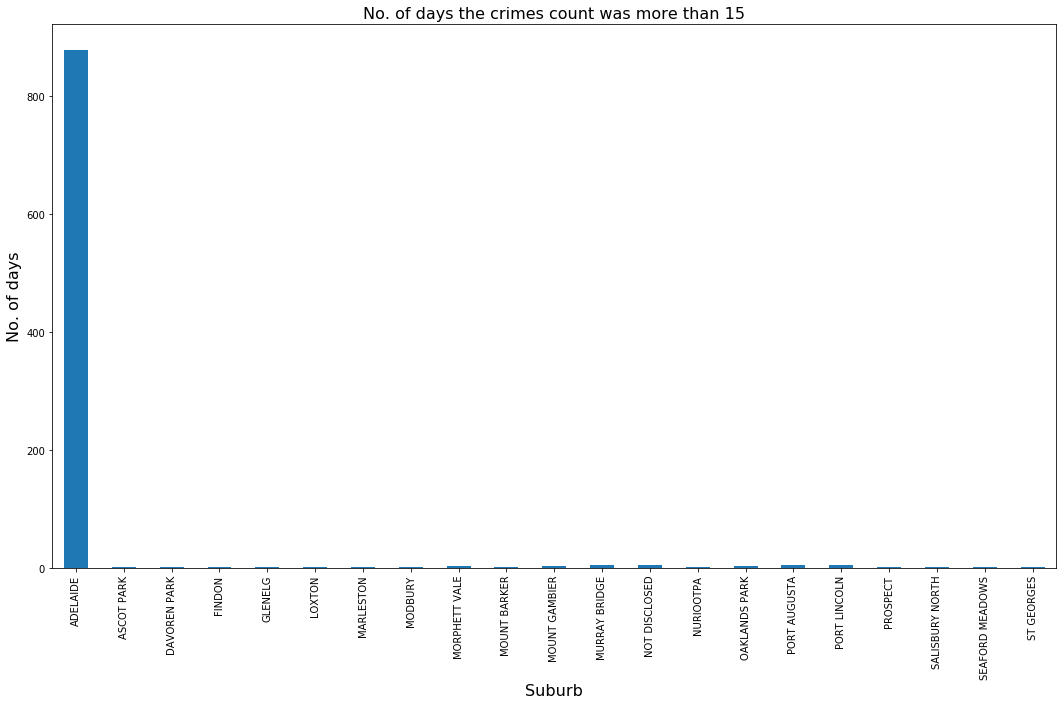

In [38]:
# Plot the number of days that at least 15 crimes have occurred for the suburbs 
df_b2.plot(kind='bar', legend=False, figsize=(18,10))
plt.xlabel('Suburb', fontsize=16)
plt.ylabel('No. of days', fontsize=16)
plt.title('No. of days the crimes count was more than 15', fontsize=16)
plt.show()

### 3. Use an appropriate graph to visualize and detect outliers (extreme values) on the data from step2 and remove them. Then, plot the data again using a bar graph.

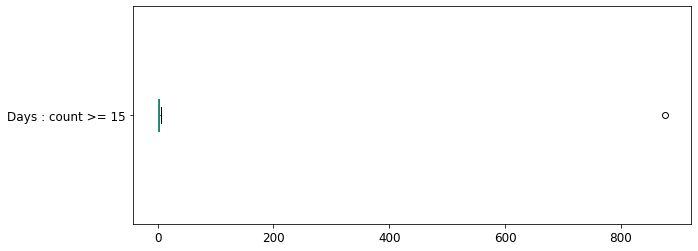

In [39]:
# Create box plot to visualize and detect outliers on the data
plt.figure(figsize=(10,4))
df_b2.boxplot(vert=False, grid=False, fontsize=12)   # Make box plot with the dataframe
plt.show()

In [40]:
# Detect outlier and remove it

q1 = df_b2.quantile(0.25)       # Calculate quartile 1
q3 = df_b2.quantile(0.75)       # Calculate quartile 3
iqr = q3-q1                     # Calculate inter quartile range
df_b3 = df_b2[~((df_b2 < (q1 - 1.5 * iqr)) | df_b2 > (q3 + 1.5 * iqr)).any(axis=1)]  # Remove outlier using formula
print('After removing the outlier the dataframe is :\n',df_b3)

After removing the outlier the dataframe is :
                    Days : count >= 15
Suburb - Incident                    
ASCOT PARK                          1
DAVOREN PARK                        1
FINDON                              1
GLENELG                             1
LOXTON                              1
MARLESTON                           1
MODBURY                             1
MORPHETT VALE                       3
MOUNT BARKER                        1
MOUNT GAMBIER                       3
MURRAY BRIDGE                       5
NOT DISCLOSED                       5
NURIOOTPA                           1
OAKLANDS PARK                       3
PORT AUGUSTA                        4
PORT LINCOLN                        5
PROSPECT                            2
SALISBURY NORTH                     1
SEAFORD MEADOWS                     1
ST GEORGES                          1


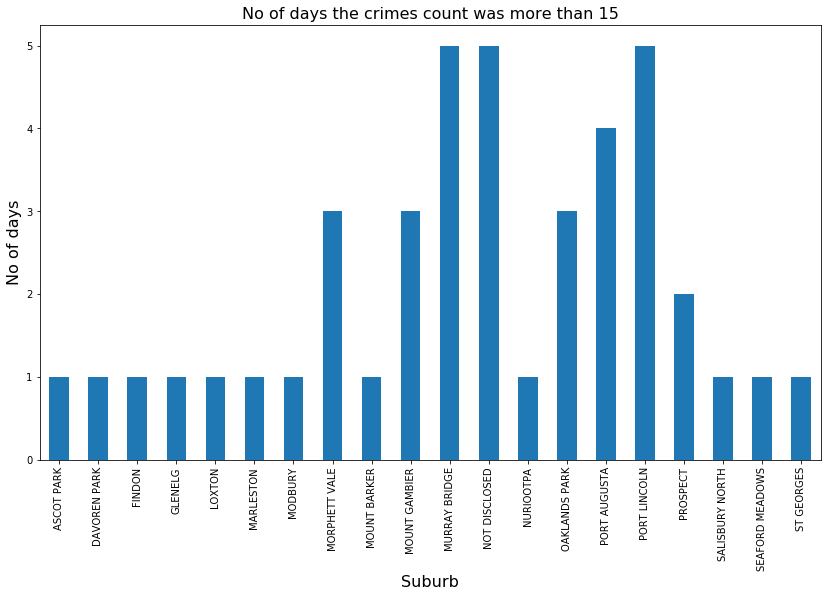

In [41]:
# Plot bar graph after removing outlier
df_b3.plot(kind='bar',legend=False,figsize=(14,8))
plt.xlabel('Suburb', fontsize=16)
plt.ylabel('No of days', fontsize=16)
plt.title('No of days the crimes count was more than 15', fontsize=16)
plt.show()

### 4. Compare the bar graphs in step 2 and 3. Which bar graph is easier to interpret? Why?

* The bar graph in step 3 is easier to interpret because the value for each suburb are easily readable and comparable with other suburbs after removing the outlier. 
* Bar graph in step 2 does not clearly visualise the variation in the number of days for each suburb because infront of Adelaide all of them have almost constant value.  

## B2. Challenge: Identify mistakes in data entry
### 1. Identify the data entry errors and provide possible solutions.

* Data Integrity issue : The column `Postcode - Incident` in the dataset is supposed to consist of postcodes of only South Australia which lies between 5000 and 5999. But in the dataset we can observe postcodes other than these. This could be a significant data entry error. 

  A possible solution to this could be considering postcodes which lie only in the range of SA postcode and ignoring the rest.
  

* Also there are entries which are 'NOT DISCLOSED' or they are in float format, which should also be taken care of during analysis. In case of postcodes in float format, their data type can be changed to integer at the beginning of analysis.

### 2. Use Python to fix the errors.

In [42]:
# Convert floats to ints after filling na with 0
df['Postcode - Incident'] = df['Postcode - Incident'].apply(pd.to_numeric, errors='coerce').fillna(0.0).astype(int)

# Create new dataframe with postcode only between 5000 and 5999 to ensure only data integrity
sa_df=df[((df['Postcode - Incident']>=5000) & (df['Postcode - Incident']<=5999 ))]

### 3. Argue how your answers to part B1 might be changed after fixing the errors.

Below code is used to compare the answers to part B1 questions before and after fixing errors.

                   Days : count >= 15
Suburb - Incident                    
ABERFOYLE PARK                      0
ADELAIDE                          877
ADELAIDE AIRPORT                    0
AGERY                               0
ALAWOONA                            0


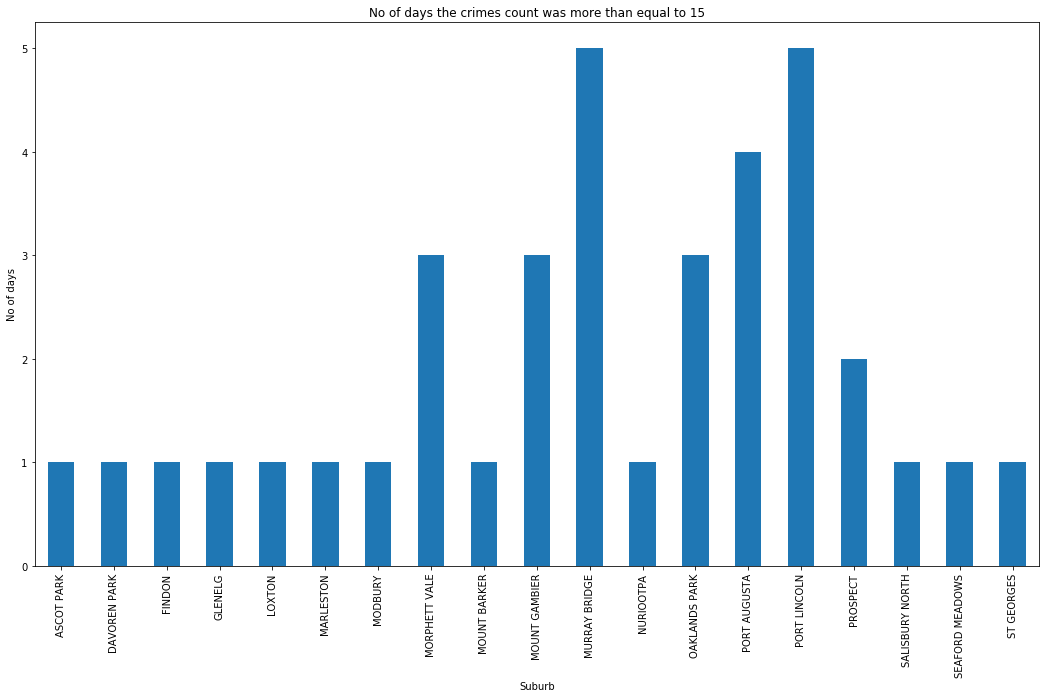

In [43]:
# For each suburb, calculating the number of days that at least 15 crimes have occurred per day

sa_new_df = sa_df.groupby(['Reported Date','Suburb - Incident']).sum() # Group by dates and suburbs and add the values per date, per suburb
sa_new_df['Days : count >= 15'] = np.where(sa_new_df['Offence Count']>=15,1,0) # Add an extra column to get 0 or 1 based on if the count is greater than or equal to 15 
sa_u_df = sa_new_df.groupby('Suburb - Incident').sum()[['Days : count >= 15']] # Group by suburbs and sum up the flag (0 or 1)
print(sa_u_df.head())

# Remove outlier by calculating quartiles 1, quartile 3 and inter quartile range
sa_df_b2 = sa_u_df[sa_u_df['Days : count >= 15']>=1]
sa_q1 = sa_df_b2.quantile(0.25)
sa_q3 = sa_df_b2.quantile(0.75)
sa_iqr = sa_q3-sa_q1
sa_df_b3 = sa_df_b2[~((sa_df_b2 < (sa_q1 - 1.5 * sa_iqr)) | sa_df_b2 > (sa_q3 + 1.5 * sa_iqr)).any(axis=1)]

# Plot bar graph after fixing errors 
sa_df_b3.plot(kind='bar',legend=False, figsize=(18,10))
plt.xlabel('Suburb')
plt.ylabel('No of days')
plt.title('No of days the crimes count was more than equal to 15')
plt.show()

We can see that after correcting the data-entry mistakes, now the new dataframe has the records that belong only to the South Australian Suburbs. And also, we now don't see the records that have addresses not disclosed. Thus, making the analysis process smoother and efficient.

## Task C: Exploratory Analysis on Other Data

###### The dataset has been taken from https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016#master.csv to analyse suicide rates among different socio-economic spectrum.

In [44]:
master_df = pd.read_csv('master.csv')  # Read csv file and store as dataframe 

master_df.head()                       # Show first 5 rows of the dataframe 

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## Suicide count for different age group

Below code is plotting a stacked bar chart for number of suicides for different age groups in the society per year for a period from 1985 to 2016.

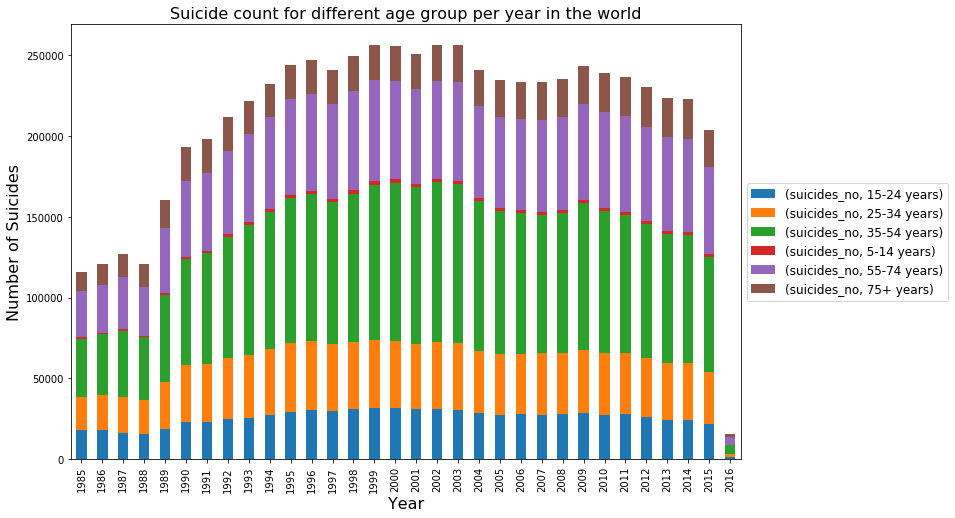

In [45]:
# Group by year and age, find sum of number of suicides 
yr_age=master_df[['year','age','suicides_no']].groupby(by=['year','age']).sum()  
# Plot stacked bar graph for different age groups
yr_age.unstack().plot(kind='bar', stacked=True, figsize=(12,8))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
plt.xlabel('Year', fontsize=16 )
plt.ylabel('Number of Suicides', fontsize=16)
plt.title('Suicide count for different age group per year in the world', fontsize=16)
plt.show()

###### Interpretation of above visualisation : 
The above bar chart clearly shows that in the past years, the number of suicides being commited by the age group 35-54 years has been the highest among all the different age groups. This age group mostly consists of the working class of the society, and this trend needs to be noted to evaluate the factors that are the major cause for such suicides. 

## Gender wise distribution in number of suicides for different years

Below python code is creating a stacked bar graph showing distribution of suicides based on gender over the years.

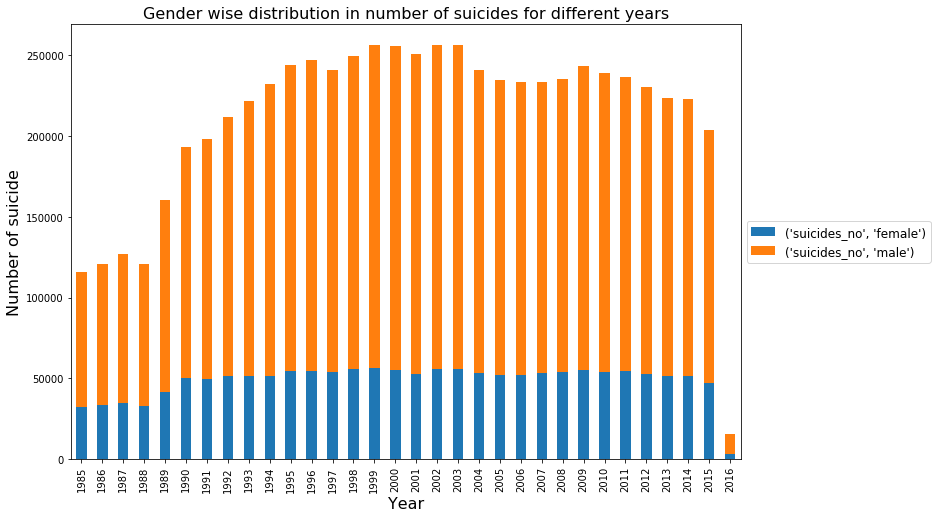

In [46]:
gender_df = master_df[['year','sex','suicides_no']].groupby(by=['year','sex']).sum()
gender_df.unstack().plot(kind='bar',stacked=True,figsize=(12,8))
plt.legend(gender_df.unstack(), loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of suicide', fontsize=16)
plt.title('Gender wise distribution in number of suicides for different years', fontsize=16)
plt.show()

##### Interpretation of above visualisation : 

The number of suicides by males every year is more than twice the number of suicides committed by females.

## Country which has the highest number of suicide rate per year

Below code is listing the country with highest number of suicides per 100k population in each year.

In [47]:
high_df = master_df[['year','country','suicides/100k pop']].groupby(by=['year','country']).sum()  # Group by year and country and add the number of suicides per 100k population
highes_su_df=high_df[high_df['suicides/100k pop'] == high_df.groupby('year')['suicides/100k pop'].transform('max')].reset_index(level=1).rename(columns={'country':'top country'}) # Create new dataframe with maximum suicide rate per year and its corressponding country

print('Country with highest number of suicides in different years\n\n',highes_su_df)

Country with highest number of suicides in different years

              top country  suicides/100k pop
year                                       
1985           Sri Lanka             558.72
1986           Sri Lanka             529.80
1987             Austria             405.88
1988           Singapore             360.19
1989  Russian Federation             398.82
1990  Russian Federation             399.17
1991             Hungary             575.00
1992             Hungary             570.26
1993             Hungary             539.28
1994  Russian Federation             567.64
1995           Lithuania             639.30
1996           Lithuania             595.61
1997           Lithuania             565.44
1998           Lithuania             566.36
1999           Lithuania             561.53
2000           Lithuania             571.80
2001           Lithuania             568.98
2002           Lithuania             555.62
2003           Lithuania             530.52
2004           

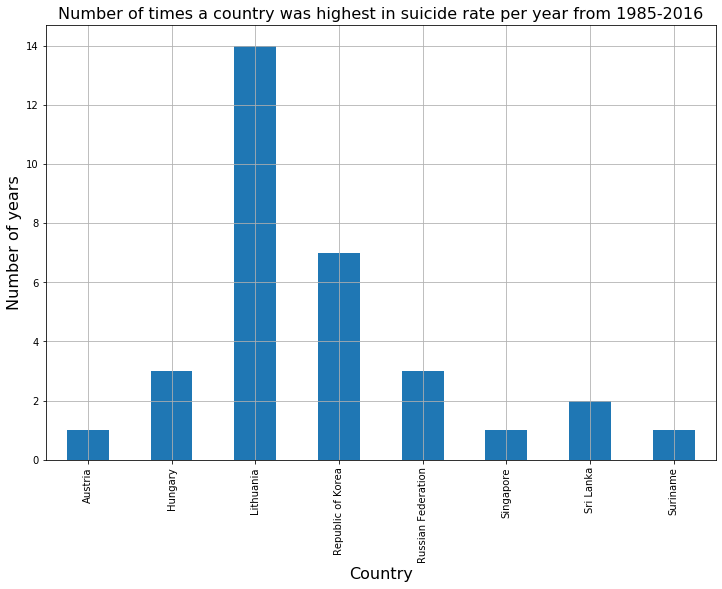

In [48]:
# Plot the top countries v/s the number of years it had the highest suicide rate
highes_su_df.groupby('top country').count().plot(kind='bar', figsize=(12,8), legend=False)
plt.xlabel('Country', fontsize=16)
plt.ylabel('Number of years', fontsize=16)
plt.title('Number of times a country was highest in suicide rate per year from 1985-2016', fontsize=16)
plt.grid()
plt.show()

###### Interpretation of above visualisation : 

Over the 32 years from 1985 to 2016, Lithuania has topped the list of suicide rates per year for 14 times, followed by Republic of Korea which saw highest number of suicides for 7 years.

## Scatter plot for United States over the years

Below python code is creating scatter plot of suicide count v/s year for United States.

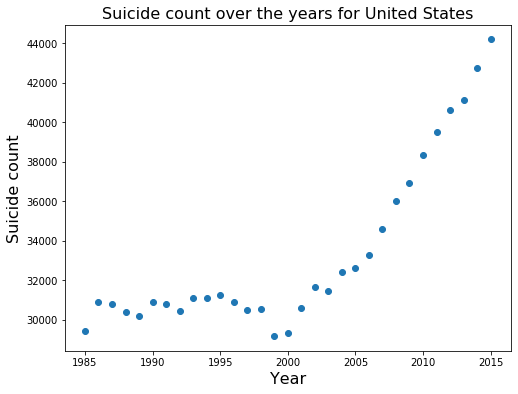

In [49]:
t_df = master_df[master_df['country']=='United States'][['year','country','suicides_no']].groupby(by=['year','country']).sum()
t_df.reset_index(inplace=True)
plt.figure(figsize=(8,6))
plt.scatter(t_df['year'].values, t_df['suicides_no'].values)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Suicide count', fontsize=16)
plt.title('Suicide count over the years for United States', fontsize=16)
plt.show()

##### Model to fit the above data points of United States


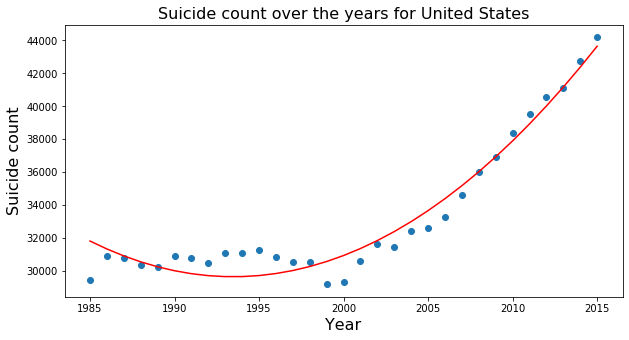

In [50]:
x_sc , y_sc = np.array(t_df['year'].values), np.array(t_df['suicides_no'].values)
x_sc = x_sc.reshape(len(x_sc),1)
y_sc = y_sc.reshape(len(y_sc),1)

polynomial_features= PolynomialFeatures(degree=2)
x_sc_poly = polynomial_features.fit_transform(x_sc)

model_sc = LinearRegression()
model_sc.fit(x_sc_poly, y_sc)

y_sc_poly_pred = model_sc.predict(x_sc_poly)

plt.figure(figsize=(10,5))
plt.scatter(x_sc, y_sc)
plt.plot(x_sc, y_sc_poly_pred, color='r')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Suicide count', fontsize=16)
plt.title('Suicide count over the years for United States', fontsize=16)
plt.show()

### Prediction of number of suicide based on the model

In [51]:
# Predicting number of suicides for United States in the year 2020

usa = model_sc.predict(polynomial_features.fit_transform(np.array(2020).reshape(1,1)))
print('The predicted number of suicides in United States for the year 2020 is:', int(usa[0,0]))

The predicted number of suicides in United States for the year 2020 is: 50904


## Reference:

Polynomial regression : https://towardsdatascience.com/polynomial-regression-bbe8b9d97491 

Task C dataset : https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016#master.csv

Scikit-learn : https://scikit-learn.org/stable/